In [1]:
#standart libraries
import os,sys
import numpy as np

# xarray
import xarray as xr

# plot
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import animation
from IPython.display import HTML

#JUPYTER notebook magics
%matplotlib inline 

In [5]:
# path of the directory where we are going to run the nextsimdg model:
dirwo = "/home/jovyan/work/"

In [12]:
cd $dirwo

/home/jovyan/work


In [15]:
ls -lrt

total 5012
lrwxrwxrwx 1 jovyan pr-sasip      22 Jun 21 04:25 nextsim -> /usr/local/bin/nextsim*
lrwxrwxrwx 1 jovyan pr-sasip      60 Jun 21 04:25 25km_NH.TOPAZ4_2010-01-01_2011-01-01.nc -> /data/model-forcings/25km_NH.TOPAZ4_2010-01-01_2011-01-01.nc
lrwxrwxrwx 1 jovyan pr-sasip      32 Jun 21 04:25 init_25km_NH.nc -> ../nextsimdg/run/init_25km_NH.nc
lrwxrwxrwx 1 jovyan pr-sasip      30 Jun 21 04:25 25km_NH.smesh -> ../nextsimdg/run/25km_NH.smesh
lrwxrwxrwx 1 jovyan pr-sasip      58 Jun 21 04:25 25km_NH.ERA5_2010-01-01_2011-01-01.nc -> /data/model-forcings/25km_NH.ERA5_2010-01-01_2011-01-01.nc
-rw-r--r-- 1 jovyan pr-sasip     642 Jun 21 04:27 config_june23.cfg
-rw-r--r-- 1 jovyan pr-sasip     642 Jun 21 04:34 config_myfirsttestcase.cfg
-rw-r--r-- 1 jovyan pr-sasip 1367291 Jun 21 04:38 restart.nc
-rw-r--r-- 1 jovyan pr-sasip     391 Jun 21 04:38 nextsim.04:35:57.log
-rw-r--r-- 1 jovyan pr-sasip 3615553 Jun 21 04:38 2010_nextsimdg-output.nc
-rw-r--r-- 1 jovyan pr-sasip  123278 Jun 21 05:0

* Open intial conditions and data

In [16]:
#Note that the "group" option is necessary to read the files (netcdf4 format).
datinit= xr.open_dataset(dirwo+'/init_25km_NH.nc',group='data')
datinit

<xarray.Dataset>
Dimensions:       (yvertex: 122, xvertex: 155, ncoords: 2, y: 121, x: 154, z: 3)
Dimensions without coordinates: yvertex, xvertex, ncoords, y, x, z
Data variables: (12/13)
    coords        (yvertex, xvertex, ncoords) float64 ...
    longitude     (y, x) float64 ...
    latitude      (y, x) float64 ...
    grid_azimuth  (y, x) float64 ...
    mask          (y, x) float64 ...
    cice          (y, x) float64 ...
    ...            ...
    hsnow         (y, x) float64 ...
    sss           (y, x) float64 ...
    sst           (y, x) float64 ...
    tice          (z, y, x) float64 ...
    u             (y, x) float64 ...
    v             (y, x) float64 ...

* plot LAND/SEA mask

<function matplotlib.pyplot.close(fig=None)>

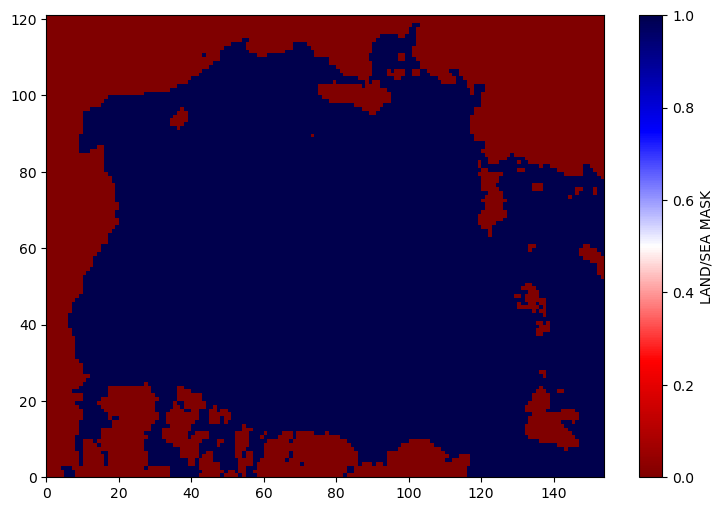

In [31]:
fig,(ax) = plt.subplots(1, 1, figsize=[9, 6],facecolor='w')
p = ax.pcolormesh(datinit.mask,cmap='seismic_r')
plt.colorbar(p,label='LAND/SEA MASK')
plt.show
plt.close

* plot SST in initial conditions

<function matplotlib.pyplot.close(fig=None)>

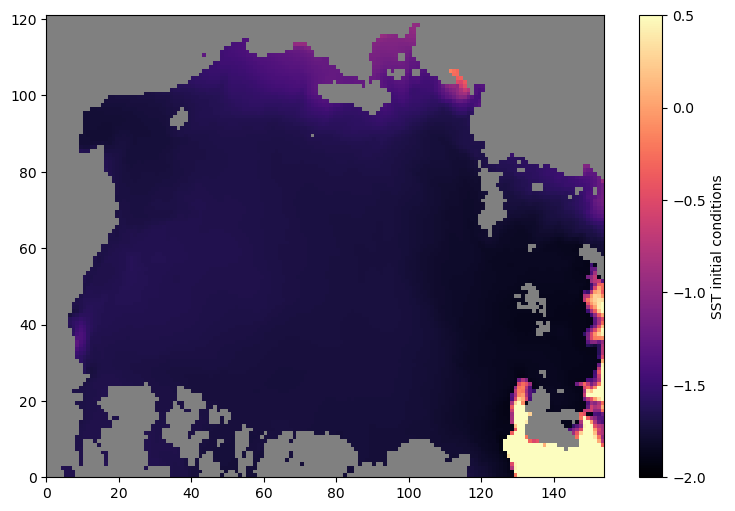

In [29]:
data2plt = datinit.sst
data2plt_masked = data2plt.where(data2plt<100)

cmap = cm.magma
cmap.set_bad('gray',1.)

fig,(ax) = plt.subplots(1, 1, figsize=[9, 6],facecolor='w')
p = ax.pcolormesh(data2plt_masked,cmap=cmap,vmin=-2,vmax=0.5)
plt.colorbar(p,label='SST initial conditions')
plt.show
plt.close

* open the output file

In [32]:
#Note that the "group" option is necessary to read the files (netcdf4 format).
outputs= xr.open_dataset(dirwo+'/2010_nextsimdg-output.nc',group='data')
outputs

<xarray.Dataset>
Dimensions:  (time: 4, y: 121, x: 154, z: 3)
Coordinates:
  * time     (time) float64 1.262e+09 1.262e+09 1.263e+09 1.263e+09
Dimensions without coordinates: y, x, z
Data variables:
    cice     (time, y, x) float64 ...
    hice     (time, y, x) float64 ...
    hsnow    (time, y, x) float64 ...
    tice     (time, z, y, x) float64 ...

<function matplotlib.pyplot.show(close=None, block=None)>

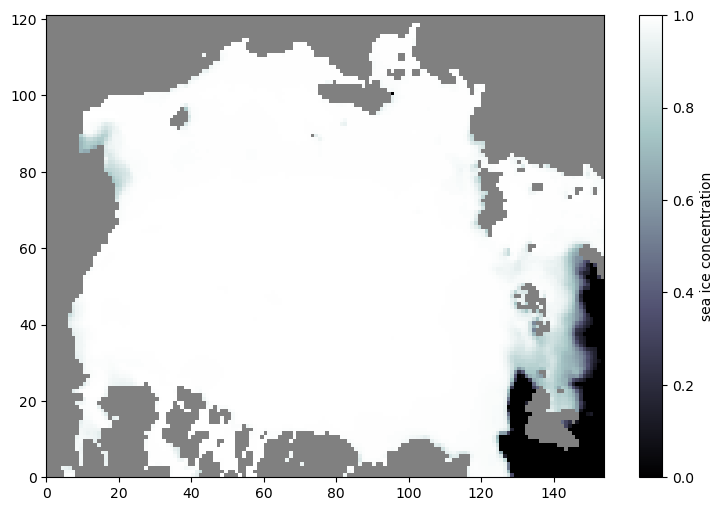

In [33]:

it=0

cmap = cm.bone
cmap.set_bad('gray',1.)

data2plt = outputs.cice.isel(time=it)
data2plt_masked = data2plt.where(data2plt<100)

# create figure
fig,(ax) = plt.subplots(1, 1, figsize=[9, 6],facecolor='w')

p = ax.pcolormesh(data2plt_masked,vmin=0,vmax=1,cmap=cmap)
plt.colorbar(p,label='sea ice concentration')
plt.show